In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("A2Q1.csv",header=None)
data=np.array(data)

In [2]:
K=4
N,D= data.shape
number_of_iterations =20
number_of_random_intialisations=100
loglikelihood=np.zeros(number_of_iterations)
for j in range(number_of_random_intialisations) :
    
    PI = np.random.rand(K)
    PI_prev = np.random.rand(K)
    PI/=np.sum(PI)
    prob=np.random.rand(K,D)
   
  
    for x in range(number_of_iterations) :    
        lamda = np.ones((N,K))
#step 1  
        for k in range(K):
            lamda[:, k] = PI[k] * np.prod(prob[k] ** data * (1 - prob[k]) ** (1 - data), axis=1)
        lamdtemp=np.sum(lamda,axis=1)
        
        lamda /= np.sum(lamda, axis=1,keepdims=True)
        
#step 2 
        PI_prev=PI  
        PI=np.sum(lamda,axis=0)/N
        prob= np.matmul(lamda.T , data) / np.sum(lamda, axis=0)[:, np.newaxis]
        
        #temp = np.sum(np.log(np.dot(lamda, PI)))
        for i in range(N) :

         loglikelihood[x]+=np.log(lamdtemp[i])
        
       
print(PI)

[0.17594564 0.32055549 0.25244423 0.25105463]


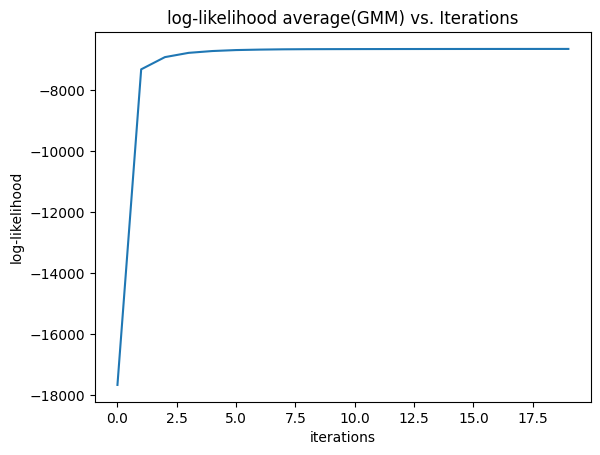

In [3]:
plt.plot(range(number_of_iterations), loglikelihood/number_of_random_intialisations)
plt.xlabel("iterations")
plt.ylabel("log-likelihood")
plt.title("log-likelihood average(GMM) vs. Iterations")
plt.show()